## Project Overview
This project focuses on **cleaning, preprocessing, and exploratory data analysis (EDA)** of the **Global Superstore dataset**, a widely used retail dataset containing information about orders, customers, products, regions, and sales.
The goal of this project is to transform raw, messy data into a **clean, analysis-ready dataset** while demonstrating core **data analyst skills** using Python.

### Dataset
- **Source:** Global Superstore Dataset
- **Format:** CSV
- **Records:** Orders-level retail transaction data
- **Key Columns:**
  - Order Date
  - Sales
  - Profit
  - Category & Sub-Category
  - Customer & Region details

### Tools & Technologies
- **Python**
- **Pandas**
- **NumPy**
- **Matplotlib**
- **Seaborn**
- **Jupyter Notebook / Python Script**

### Data Cleaning Steps
The following data quality issues were identified and resolved:

### 1️⃣ Column Standardization
- Converted column names to **snake_case**
- Removed extra spaces and formatting inconsistencies

### 2️⃣ Date Formatting
- Converted `order_date` column to proper **datetime** format
- Handled invalid or incorrectly formatted dates

### 3️⃣ Missing Value Handling
- **Numerical columns:** Filled using **median**
- **Categorical columns:** Filled using **mode**

### 4️⃣ Duplicate Removal
- Identified and removed duplicate records to ensure data accuracy

### 5️⃣ Outlier Detection & Treatment
- Applied **IQR (Interquartile Range)** method on `sales`
- Removed extreme outliers to improve analysis reliability


## GLOBAL SUPERSTORE DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load data

In [2]:
df = pd.read_csv(r"C:\analytics\data\TB Global Superstore Data - Orders.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31/7/2012,31/7/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17/10/2013,18/10/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28/1/2013,30/1/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


#### 2. Basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

#### 3. Standardize column names

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [5]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

#### 4. Data formatting

In [6]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

C:\Users\jsmpa\AppData\Local\Temp\ipykernel_3916\3647451503.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")


#### 5. Remove duplicates

In [7]:
df = df.drop_duplicates()


#### 6. Handle missing values

In [10]:
df.isnull().sum()*100/len(df)

row_id             0.00000
order_id           0.00000
order_date         0.00000
ship_date          0.00000
ship_mode          0.00000
customer_id        0.00000
customer_name      0.00000
segment            0.00000
city               0.00000
state              0.00000
country            0.00000
postal_code       80.51472
market             0.00000
region             0.00000
product_id         0.00000
category           0.00000
sub-category       0.00000
product_name       0.00000
sales              0.00000
quantity           0.00000
discount           0.00000
profit             0.00000
shipping_cost      0.00000
order_priority     0.00000
dtype: float64

In [14]:
df = df.drop(['postal_code'],axis=1)

In [15]:
df.isnull().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
city              0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

#### Numeric column -- median

In [16]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


#### Categorical column -- mode

In [17]:
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#### Outlier handling

In [18]:
Q1 = df["sales"].quantile(0.25)
Q3 = df["sales"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["sales"] >= lower_bound) & (df["sales"] <= upper_bound)]


#### Sales distribution

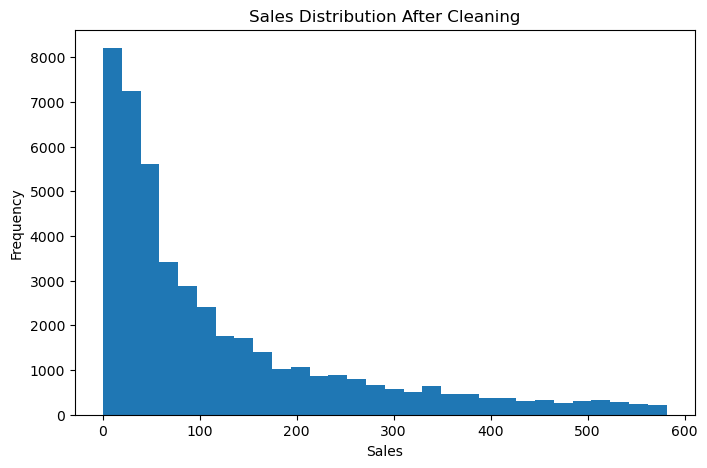

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(df["sales"], bins=30)
plt.title("Sales Distribution After Cleaning")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

#### Monthly sales trend

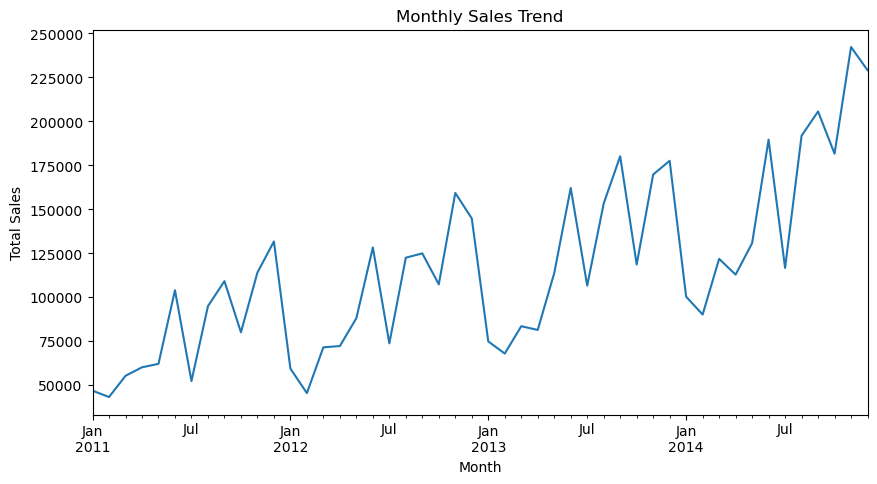

In [22]:
monthly_sales = df.groupby("order_month")["sales"].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

#### Boxplot for outlier

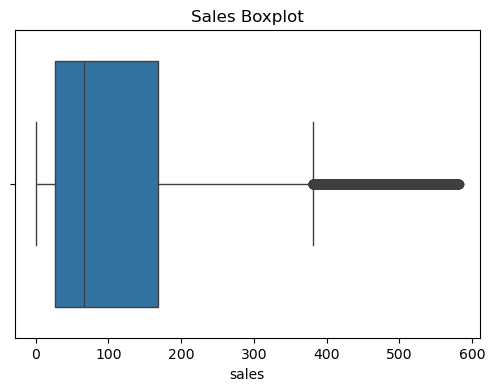

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["sales"])
plt.title("Sales Boxplot")
plt.show()

#### Save cleaned data

In [24]:
df.to_csv(r"C:\analytics\data\TB Global Superstore Data - Orders.csv", index=False)

#### Conclusion

“I cleaned the Global Superstore dataset using Python by standardizing column names, fixing date formats, handling missing values with median and mode, removing duplicates, and treating outliers using the IQR method. I also created visualizations to validate data quality and exported a cleaned CSV for further analysis.”